In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
%matplotlib inline

In [2]:
wavelength = np.arange(400,700,0.5)

'Loading Macbeth dataset'

macbeth = np.loadtxt("macbeth.txt")
macbeth_wav, macbeth_ref =  macbeth[4:64,0], macbeth[4:64,1:]
macbeth_r = np.zeros(shape=[len(wavelength),24])


for i in range(1,25):
    macbeth_r[:,i-1] = np.interp(wavelength, macbeth_wav, macbeth_ref[:,i-1])

In [3]:
std_source = np.loadtxt("standard_illuminants.txt")
std_wav, std_s = std_source[:,0], std_source[:,1:]

source = np.zeros(shape=[len(wavelength),6])

for i in range(6):
    s = np.interp(wavelength, std_wav, std_s[:,i])
    source[:,i] = s/s.max()

In [4]:
cie = np.loadtxt("CIE1964.txt")
wav, x_, y_, z_ = cie[:,0], cie[:,1], cie[:,2], cie[:,3]

x_ = np.interp(wavelength, wav, x_)
x_ = x_/x_.max()

y_ = np.interp(wavelength, wav, y_)
y_ = y_/y_.max()

z_ = np.interp(wavelength, wav, z_)
z_ = z_/z_.max()

In [5]:
flourescent = np.loadtxt("flourescent.txt")

flourescent = np.interp(wavelength, flourescent[:,0], flourescent[:,1])
flourescent = flourescent/flourescent.max()

In [6]:
z_.shape

(600,)

In [7]:
def f(t):
    if t > (6/29)**3:
        return t**(1/3)
    else:
        return (((29/6)**2)/3)*t + 4/29


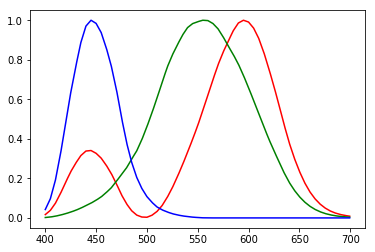

In [8]:
plt.plot(wavelength, x_, 'r')
plt.plot(wavelength, y_, 'g')
plt.plot(wavelength, z_, 'b')
plt.show()

In [26]:
def CIELab(source):
    
    L,a,b = [],[],[]
        
    X_n = np.trapz(source*x_)
    Y_n = np.trapz(source*y_)
    Z_n = np.trapz(source*z_)

    for i in range(0,24):
        X = np.trapz(macbeth_r[:,i]*source*x_)
        Y = np.trapz(macbeth_r[:,i]*source*y_)
        Z = np.trapz(macbeth_r[:,i]*source*z_)
        
        L.append(116*f(Y/Y_n)-16)
        a.append(500*(f(X/X_n)-f(Y/Y_n)))
        b.append(200*(f(Y/Y_n)-f(Z/Z_n)))
        
    return [L,a,b]


In [27]:
LAB_1

[[36.77794425235589,
  65.79867685647612,
  51.62253903261005,
  42.04135324535195,
  57.46914025651573,
  71.69981173617104,
  59.548201641962805,
  42.73485556183453,
  50.47537228399226,
  31.252324338726034,
  70.63927610196914,
  69.92169066417772,
  32.601807121168314,
  54.79527021635903,
  40.25600891465492,
  79.90655240921112,
  51.353886512539276,
  53.44741637890722,
  95.45476775542589,
  80.94331630603271,
  66.37579867278629,
  52.17813908369324,
  36.48726344134476,
  21.438325903278226],
 [13.885174147737905,
  13.395512702089107,
  -3.806120376678934,
  -12.271444782829654,
  6.607366863199015,
  -30.111546800330014,
  33.715510692534146,
  7.462528288159687,
  42.347051364725495,
  20.157594169158273,
  -19.610956406166558,
  20.167879833730527,
  13.164427978074489,
  -33.9976549400709,
  48.46401613007714,
  4.400196445909277,
  42.76428578611557,
  -30.15384052819653,
  -0.46182161181784753,
  0.17097612586691735,
  0.10355144598500621,
  0.09946770889834866,
  -0

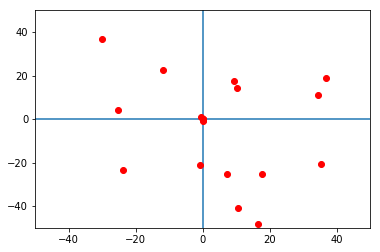

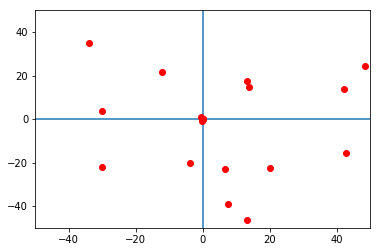

In [28]:
LAB_1 = CIELab(flourescent)
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.axhline(0)
plt.axvline(0)
plt.plot(LAB_1[1],LAB_1[2], 'ro')
plt.show()

LAB_1 = CIELab(source[:,1])
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.axhline(0)
plt.axvline(0)
plt.plot(LAB_1[1],LAB_1[2], 'ro')
plt.show()

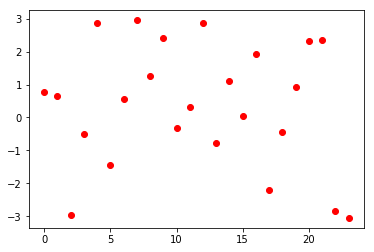

In [29]:
plt.plot(np.arctan2(LAB_1[1],LAB_1[2]), 'ro')

In [72]:
LAB_2 = CIELab(source[:,1])

In [1]:
def del_E_76(LAB_1,LAB_2):
    d_e = np.sqrt((LAB_1[0][i]-LAB_2[0][i])**2 + (LAB_1[1][i]-LAB_2[1][i])**2 + (LAB_1[2][i]-LAB_2[2][i])**2)
    dE.append(d_e)
    return dE

In [80]:
del_E_76(LAB_1,LAB_2)

[3.7559594199454858,
 4.011583728373291,
 4.299684209854271,
 1.810834806038436,
 2.230358668196502,
 6.395297175712435,
 8.184141075029412,
 4.110447298920064,
 8.381869022912682,
 2.578482540820508,
 2.821730567848807,
 7.150520392530999,
 4.30490226565901,
 5.500209818563764,
 12.859146864671304,
 4.7680904360517316,
 8.037299042427481,
 7.699935096216974,
 2.938395372065214,
 2.5646552503560582,
 2.201331784129432,
 1.825811238454692,
 1.4495788652865556,
 1.018300266350031]

In [81]:
def del_E_CH(LAB_1,LAB_2):
    
    C1 = np.sqrt((LAB_1[1][i])**2+(LAB_1[2][i])**2)
    C2 = np.sqrt((LAB_2[1][i])**2+(LAB_2[2][i])**2)
    h1 = np.arctan((LAB_1[2][i])/(LAB_1[1][i]))
    h2 = np.arctan((LAB_2[2][i])/(LAB_2[1][i]))
    d_e = np.sqrt((LAB_1[0][i]-LAB_2[0][i])**2 + (C2-C1)**2 + (h2-h1)**2)
    return d_e

In [82]:
del_E_CH(LAB_1,LAB_2)

[2.1194618271877994,
 1.3417906884262323,
 2.691687359717311,
 0.9353818582449279,
 2.2298372679955354,
 2.4909894208499037,
 6.150792501651027,
 3.736660666508547,
 7.380422362181851,
 1.8428447288138243,
 1.5731952528645916,
 3.823079642356521,
 4.126457090296458,
 3.299477599014361,
 12.223695443419318,
 3.1249520899550376,
 7.180241416701543,
 5.11013995183039,
 2.936250326519534,
 2.5643634712337646,
 2.200108980446658,
 1.824600073429348,
 1.4415827612548406,
 3.2931807352852767]